In [1]:
# 3 Applications
# a) Offer it to job portals to let customers check what salary they can expect  
# b) Offer to HR to figure out what job title to put into applications to pay least 
# c) Offer to job seekers to find out what job title they should use / look out for to earn most

In [2]:
!pip install pycountry

In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
#imports
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pycountry
import re
import json
import numpy as np

%matplotlib inline

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from geopy.geocoders import Nominatim

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder

In [5]:
df1 = pd.read_csv('salaries.csv')
df1

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Analytics Manager,145400,USD,145400,US,0,US,M
1,2024,MI,FT,Data Analytics Manager,88000,USD,88000,US,0,US,M
2,2024,MI,FT,Analytics Engineer,205500,USD,205500,US,0,US,M
3,2024,MI,FT,Analytics Engineer,117400,USD,117400,US,0,US,M
4,2024,SE,FT,Business Intelligence Analyst,148300,USD,148300,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
12134,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
12135,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
12136,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
12137,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
df1.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [7]:
#dropping irrevalant columns irrelevant to the model
df1 = df1.drop(columns = ["work_year", "salary", "salary_currency", "employee_residence"])

In [8]:
# Define the unique values you want to drop
values_to_drop = ['CT', 'PT', 'FL']

# Drop rows with specified values in the 'Name' column
df1 = df1[~df1['employment_type'].isin(values_to_drop)]


In [9]:
#dropping irrevalant columns irrelevant to the model
df1 = df1.drop(columns = ["employment_type",])
df1

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,MI,Data Analytics Manager,145400,0,US,M
1,MI,Data Analytics Manager,88000,0,US,M
2,MI,Analytics Engineer,205500,0,US,M
3,MI,Analytics Engineer,117400,0,US,M
4,SE,Business Intelligence Analyst,148300,0,US,M
...,...,...,...,...,...,...
12133,SE,Data Specialist,165000,100,US,L
12134,SE,Data Scientist,412000,100,US,L
12135,MI,Principal Data Scientist,151000,100,US,L
12136,EN,Data Scientist,105000,100,US,S


In [10]:
df1.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [11]:
df1.isnull().any()

experience_level    False
job_title           False
salary_in_usd       False
remote_ratio        False
company_location    False
company_size        False
dtype: bool

In [12]:
# Function to map country code to country name

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name # This method is used to retrieve a country object from the collection based on the provided alpha_2 code.
    except AttributeError:
        return code  # Return the code if no matching country is found

# Apply the function to create a new 'company_location' column with country names
df1['company_location'] = df1['company_location'].apply(get_country_name)

# Display the updated DataFrame
df1

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,MI,Data Analytics Manager,145400,0,United States,M
1,MI,Data Analytics Manager,88000,0,United States,M
2,MI,Analytics Engineer,205500,0,United States,M
3,MI,Analytics Engineer,117400,0,United States,M
4,SE,Business Intelligence Analyst,148300,0,United States,M
...,...,...,...,...,...,...
12133,SE,Data Specialist,165000,100,United States,L
12134,SE,Data Scientist,412000,100,United States,L
12135,MI,Principal Data Scientist,151000,100,United States,L
12136,EN,Data Scientist,105000,100,United States,S


In [13]:
# Add a new column named 'gender' and 'bonus_stocks_usd' with values


df1['gender'] = 'Unknown'
df1['bonus_stocks_usd'] = 'Unknown'# This will raise the error

# Display the DataFrame after adding the new column
df1

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,gender,bonus_stocks_usd
0,MI,Data Analytics Manager,145400,0,United States,M,Unknown,Unknown
1,MI,Data Analytics Manager,88000,0,United States,M,Unknown,Unknown
2,MI,Analytics Engineer,205500,0,United States,M,Unknown,Unknown
3,MI,Analytics Engineer,117400,0,United States,M,Unknown,Unknown
4,SE,Business Intelligence Analyst,148300,0,United States,M,Unknown,Unknown
...,...,...,...,...,...,...,...,...
12133,SE,Data Specialist,165000,100,United States,L,Unknown,Unknown
12134,SE,Data Scientist,412000,100,United States,L,Unknown,Unknown
12135,MI,Principal Data Scientist,151000,100,United States,L,Unknown,Unknown
12136,EN,Data Scientist,105000,100,United States,S,Unknown,Unknown


In [14]:
df1.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [15]:
df1.isnull().any()

experience_level    False
job_title           False
salary_in_usd       False
remote_ratio        False
company_location    False
company_size        False
gender              False
bonus_stocks_usd    False
dtype: bool

In [16]:
#shows unique values in "company_location" column 
df1.company_location.unique()

array(['United States', 'Canada', 'Italy', 'United Kingdom', 'Germany',
       'Latvia', 'American Samoa', 'Egypt', 'Lithuania', 'Ireland',
       'France', 'South Africa', 'Estonia', 'Netherlands', 'India',
       'Spain', 'Australia', 'Ukraine', 'Malta', 'Lebanon', 'Romania',
       'Portugal', 'New Zealand', 'Hungary', 'Viet Nam', 'Nigeria',
       'Philippines', 'Poland', 'Gibraltar', 'Colombia', 'Slovenia',
       'Greece', 'Mauritius', 'Russian Federation', 'Korea, Republic of',
       'Czechia', 'Switzerland', 'Brazil', 'Qatar', 'Kenya', 'Denmark',
       'Ghana', 'Sweden', 'Türkiye', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Saudi Arabia', 'Norway', 'Argentina', 'Japan',
       'Hong Kong', 'Central African Republic', 'Finland', 'Singapore',
       'Thailand', 'Croatia', 'Armenia', 'Bosnia and Herzegovina',
       'Pakistan', 'Austria', 'Puerto Rico', 'Belgium', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Iraq', 'China',
       'Chile', 'Moldova

In [17]:
df1.head()

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,gender,bonus_stocks_usd
0,MI,Data Analytics Manager,145400,0,United States,M,Unknown,Unknown
1,MI,Data Analytics Manager,88000,0,United States,M,Unknown,Unknown
2,MI,Analytics Engineer,205500,0,United States,M,Unknown,Unknown
3,MI,Analytics Engineer,117400,0,United States,M,Unknown,Unknown
4,SE,Business Intelligence Analyst,148300,0,United States,M,Unknown,Unknown


## Day 2 

In [18]:
df2 = pd.read_csv('df2_3pm.csv')
df2

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,gender
0,SE,Data scientist,149000.0,NaN,United States,Unknown,Unknown
1,SE,Data scientist,120000.0,NaN,United States,Unknown,Unknown
2,SE,Data scientist,68000.0,NaN,United Kingdom,Unknown,Unknown
3,SE,Data scientist,120000.0,NaN,United States,Unknown,Unknown
4,SE,Data scientist,149000.0,NaN,United States,Unknown,Unknown
...,...,...,...,...,...,...,...
1069,SE,ML Ops,55000.0,NaN,United States,Unknown,Unknown
1070,SE,ML Ops,228000.0,NaN,Canada,Unknown,Unknown
1071,SE,ML Ops,115000.0,NaN,United States,Unknown,Unknown
1072,SE,ML Ops,76000.0,NaN,India,Unknown,Unknown


In [19]:
df2.experience_level.unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [20]:
df3 = pd.read_csv('df3.csv')
df3

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,gender,bonus_stocks_usd
0,MI,Software Engineer,86592.00,0,Germany,M,Male,5412.00
1,MI,Backend Developer,86592.00,0,Germany,M,Male,NaN
2,EN,Frontend Developer,58449.60,0,Germany,M,Male,NaN
3,MI,Backend Developer,67108.80,0,Germany,M,Male,NaN
4,MI,DevOps,82262.40,0,Germany,S,Male,5412.00
...,...,...,...,...,...,...,...,...
1161,MI,Backend Developer,75768.00,0,Germany,M,Male,77932.80
1162,MI,Researcher/ Consumer Insights Analyst,64944.00,0,Germany,L,Male,3247.20
1163,SE,IT Operations Manager,119064.00,0,Germany,M,Male,0.00
1164,MI,Frontend Developer,41510.04,0,Germany,M,Male,44324.28


In [21]:
df3.experience_level.unique()

array(['MI', 'EN', 'SE', 'EX'], dtype=object)

In [22]:
#naming, concatinating and retrieving the DF
merged_df = pd.concat([df1,df2,df3], axis=0)
merged_df

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,gender,bonus_stocks_usd
0,MI,Data Analytics Manager,145400.00,0.0,United States,M,Unknown,Unknown
1,MI,Data Analytics Manager,88000.00,0.0,United States,M,Unknown,Unknown
2,MI,Analytics Engineer,205500.00,0.0,United States,M,Unknown,Unknown
3,MI,Analytics Engineer,117400.00,0.0,United States,M,Unknown,Unknown
4,SE,Business Intelligence Analyst,148300.00,0.0,United States,M,Unknown,Unknown
...,...,...,...,...,...,...,...,...
1161,MI,Backend Developer,75768.00,0.0,Germany,M,Male,77932.8
1162,MI,Researcher/ Consumer Insights Analyst,64944.00,0.0,Germany,L,Male,3247.2
1163,SE,IT Operations Manager,119064.00,0.0,Germany,M,Male,0.0
1164,MI,Frontend Developer,41510.04,0.0,Germany,M,Male,44324.28


In [23]:
# Assuming df is your DataFrame and 'column_to_modify' is the column containing "unknown" values
# df['column_to_modify'] should be the column where you want to replace "unknown" with NaN

# Replace "unknown" with NaN in the specified column
merged_df['company_size'] = merged_df['company_size'].replace('Unknown', np.nan)
merged_df['company_size'] = merged_df['company_size'].replace('unknown', np.nan)
merged_df['company_size'].fillna(merged_df['company_size'].mode()[0], inplace=True)
merged_df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [24]:
# clean job titles and begin to aggregate

merged_df.job_title.astype(str)
merged_df.job_title = merged_df.job_title.str.strip().str.lower()
job_title_replacements = {'staff': '', 'principal': 'lead', 'specialist': '','consultant':'',
                         'bi':'business intelligence','ml':'machine learning','managet':'manager','management':'manager',
                         'architekt':'architect',}
merged_df.job_title = merged_df.job_title.replace(job_title_replacements, regex=True).str.strip()

In [25]:
# aggregate job titles in a dictionary and apply to transform to merged_df['job_title_mapped'

job_title_map = {'data analyst':['data analyst', 'db developer/data analyst', 'admin & data analyst',
                                 'business data analyst','staff data analyst','product data analyst',
                                 'marketing data analyst','marketing analyst','dana analyst',
                                 'data analytics consultant','data analytics specialist','consultant data analytics',
                                 'admin & data analyst','data','stuttgart','','analyst','data analytics'],
                 'account manager': ['account manager','application','technical account manager'],
                 'agile coach/scrum master': ['agile master','agile coach','senior scrum master (rte)',
                                              'scrum master'],
                 'ai developer':['ai engineer','ai architect','deep learning engineer','ai developer',
                                 'ai programmer'],
                 'ai research engineer': ['ai research engineer'],
                 'ai scientist': ['ai scientist','autonomous vehicle technician','computer vision researcher',
                                  'deep learning researcher'],
                 'backend developer': ['backend developer'],
                 'business development/sales': ['business development manager operations','sales',
                                                'software sales'],
                 'business intelligence analyst':['business intelligence analyst','bi analyst','insight analyst',
                                                 'bi data analyst','business intelligence data analyst','technical business analyst',
                                                 'data visualization analyst','business analyst','technical business analyst',
                                                 'business intelligence manager','data visualization','business intelligence',
                                                 'data visualization analyst','business intelligenceg data',
                                                 'product analyst','technical business analyst','sap bw senior'],
                 'business intelligence engineer': ['reporting engineer','business intelligence it',
                                                    'business intelligenceg data engineer','data visualization engineer',
                                                    'power business intelligence developer','business intelligence engineer',
                                                    'business intelligence developer','business intelligence  sap/ data engineer',
                                                    'business intelligence data engineer','business intelligenceg data architect',
                                                    'business intelligence developer / data engineer'],
                 'cloud data engineer': ['cloud database engineer','cloud data engineer','cloud engineer'],
                 'computer vision engineer': ['computer vision engineer','computer vision software engineer'],
                 'data architect': ['data architect','data strategist','data strategy manager','aws data architect',
                                    'lead data architect','cloud data architect','cloud architect'],
                 'data quality analyst': ['data quality analyst','data quality manager'],
                 'data operations/infrastructure': ['data management analyst','data operations analyst',
                                                    'compliance data analyst','data operations associate',
                                                    'data operations manager','data operations','operations',
                                                    'data center manager','operations manager','sre','dba',
                                                    'data operations engineer','data infrastructure engineer',
                                                    'dataops team lead','data devops engineer'],
                 'data integrations engineer': ['data integration developer','data integration engineer',
                                                'data integration','data pipeline engineer'],
                 'data engineer/developer': ['analytics engineer','data analytics engineer','data developer',
                                             'etl developer','senior data engineer','azure data engineer',
                                             'databengineer','software data engineer',
                                             'etl engineer','marketing data engineer',
                                             'support engineer','data engineer'],
                 'data modeller': ['data modeler','data modeller'],
                 'data product manager': ['data product manager','data manager','data manager analyst','data product owner',
                                          'manager data manager'],
                 'data scientist': ['data scientist','data science','applied scientist','data science practitioner',
                                    'marketing data scientist','applied data scientist'],
                 'data science manager': ['data science manager'],
                 'data science engineer': ['prompt engineer','data science engineer'],
                 'devops': ['devops','devops manager', 'it operations manager'],
                 'financial data analyst': ['financial data analyst','finance data analyst'],
                 'frontend developer': ['frontend developer'],
                 'graphic designer': ['graphic designer'],
                 'hardware engineer': ['hardware engineer','robotics engineer'],
                 'head of data analytics': ['lead data analyst','data analyst lead','principal data analyst',
                                      'data analytics manager','data analytics lead','teamachine learningead','data lead',
                                      'head of data','team lead','team manager','head of business intelligence'],
                 'lead data science': ['data science director','data science lead','director of data science',
                                      'managing director data science','lead data scientist','head of data science',
                                      'data science tech lead','data scientist lead'],
                 'lead data engineer': ['analytics engineering manager','lead data engineer'],
                 'localisation manager': ['localization producer'],
                 'machine learning engineer': ['machine learning engineer','machine learning software engineer',
                                               'machine learning infrastructure engineer','machine learning developer',
                                               'applied machine learning engineer','nlp engineer',
                                               'firmware engineer'],
                 'head of machine learning': ['head of machine learning','lead machine learning engineer',
                                             'machine learning manager'],
                 'machine learning researcher': ['machine learning research engineer','machine learning researcher'],
                 'machine learning scientist': ['machine learning scientist','machine learning modeler','machine learning',
                                               'applied machine learning scientist','machine learning',
                                               'machine learning modeler','decision scientist',
                                               'computational linguist'],
                 'machine learning operations': ['machine learning ops','machine learningops engineer',
                                                 'machine learning ops engineer','machine learning operations engineer'],
                 'system administrator': ['network administrator','systemadministrator','network engineer',
                                          'system administrator','senior network&security eng.'],
                 'solutions architect': ['presales engineer','software architect','solution architect',
                                        'solutions architect','it spezialist'],
                 'product owner/manager': ['product manager','technical project manager','manager',
                                          'ai product manager','ai manager'],
                 'professor': ['professor'],
                 'program manager': ['senior program manager','program manager','sap','erp','project manager'],
                 'qa engineer': ['test manager','qa engineer','testautomation','data quality engineer',
                                 'qa lead','testmanager','qa manager','software developer in test'],
                 'recruiter': ['recruiter','tech recruiting'],
                 'research analyst': ['research analyst','researcher/ consumer insights analyst',
                                     'researcher','researcher/ consumer insights analyst'],
                 'research scientist': ['research scientist'],
                 'research engineer': ['research engineer'],
                 'research lead': ['chief research officer'],
                 'security manager': ['security manager','security engineer'],
                 'software architect': ['architect','sw architect','it consulting'],
                 'head of engineering': ['tech lead / full-stack','tech lead','technical lead','head of engineering',
                                        'engineering manager','it manager','head of it','lead software developer',
                                        'engineering team lead','lead developer','vp engineering','cto',
                                        'director of engineering','tech leader'],
                 'mobile developer': ['ios developer','mobusiness intelligencele developer'],
                 'fullstack developer': ['software engineer','c/c++/java developer','sap developer',
                                         'fullstack engineer, ну или software engineer','embedded software engineer',
                                         'xr developer','engineer','full-stack developer','fullstack developer'],
                 'ux/ui designer': ['designer (ui/ux)'],
                 'other': ['beikoch','banker']
                }

merged_df['job_title_mapped'] = merged_df['job_title'].apply(lambda x: next((key for key, value in job_title_map.items() 
                                                                             if x in value), None))

# drop old job_title column; rename and reorder job_title_mapped
merged_df.drop('job_title',axis=1,inplace=True)
merged_df.rename(columns={'job_title_mapped': 'job_title'}, inplace=True)

new_column_order = ['experience_level','job_title','salary_in_usd', 'remote_ratio', 'company_location',
                    'company_size','gender','bonus_stocks_usd']
merged_df = merged_df[new_column_order]

merged_df.job_title.value_counts()

job_title
data scientist                    3500
data engineer/developer           3087
data analyst                      2254
machine learning engineer         1545
machine learning scientist         402
research scientist                 385
fullstack developer                376
data architect                     322
business intelligence engineer     322
business intelligence analyst      288
research engineer                  214
data product manager               194
backend developer                  161
head of data analytics             137
ai developer                       110
data science manager               105
lead data science                  101
frontend developer                  84
qa engineer                         79
research analyst                    73
data operations/infrastructure      58
devops                              55
mobile developer                    51
product owner/manager               42
machine learning operations         41
data modeller  

In [26]:
merged_df.isnull().sum()

experience_level       0
job_title              0
salary_in_usd          0
remote_ratio        1074
company_location       0
company_size           0
gender                 0
bonus_stocks_usd    1456
dtype: int64

In [27]:
merged_df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [28]:
#df2["experience_level"] = df2["experience_level"].replace({"Entry": "EN", "Mid": "MI", "Senior": "SE", "Executive": "EX"})
#df2["experience_level"].unique()

In [29]:
merged_df_mode = merged_df["remote_ratio"].mode()[0]
merged_df["remote_ratio"] = merged_df["remote_ratio"].fillna(merged_df_mode)

In [30]:
merged_df.isnull().sum()

experience_level       0
job_title              0
salary_in_usd          0
remote_ratio           0
company_location       0
company_size           0
gender                 0
bonus_stocks_usd    1456
dtype: int64

In [31]:
#merged_df_mode = merged_df["job_title"].mode()[0]
#merged_df["job_title"] = merged_df["job_title"].fillna(merged_df_mode)

In [32]:
# Drop the row with this value 541200000 from the "salary_in_usd" column

merged_df = merged_df[merged_df['salary_in_usd'] != 541200000]

merged_df

,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,gender,bonus_stocks_usd
0,MI,head of data analytics,145400.00,0.0,United States,M,Unknown,Unknown
1,MI,head of data analytics,88000.00,0.0,United States,M,Unknown,Unknown
2,MI,data engineer/developer,205500.00,0.0,United States,M,Unknown,Unknown
3,MI,data engineer/developer,117400.00,0.0,United States,M,Unknown,Unknown
4,SE,business intelligence analyst,148300.00,0.0,United States,M,Unknown,Unknown
...,...,...,...,...,...,...,...,...
1161,MI,backend developer,75768.00,0.0,Germany,M,Male,77932.8
1162,MI,research analyst,64944.00,0.0,Germany,L,Male,3247.2
1163,SE,devops,119064.00,0.0,Germany,M,Male,0.0
1164,MI,frontend developer,41510.04,0.0,Germany,M,Male,44324.28


In [33]:
max_value = merged_df['salary_in_usd'].max()
print("Maximum value in the column:", max_value)

Maximum value in the column: 920040.0


In [34]:
#Export to csv
merged_df.to_csv("final_merged_df.csv", index=False)

In [35]:
#checking for null value
merged_df.isnull().sum()

experience_level       0
job_title              0
salary_in_usd          0
remote_ratio           0
company_location       0
company_size           0
gender                 0
bonus_stocks_usd    1456
dtype: int64

In [36]:
#dropping irrevalant columns irrelevant to the model
merged_df = merged_df.drop(columns = ["gender", "bonus_stocks_usd"])
merged_df.isnull().sum()

experience_level    0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [37]:
#retrieves the categorical and numerical data types
categoricals_df = merged_df.select_dtypes(include='object')
numericals_df = merged_df.select_dtypes(include='number')

In [38]:
#outputs the numerical_df
numericals_df

,salary_in_usd,remote_ratio
0,145400.00,0.0
1,88000.00,0.0
2,205500.00,0.0
3,117400.00,0.0
4,148300.00,0.0
...,...,...
1161,75768.00,0.0
1162,64944.00,0.0
1163,119064.00,0.0
1164,41510.04,0.0


In [39]:
#outputs the categorical Df
categoricals_df

,experience_level,job_title,company_location,company_size
0,MI,head of data analytics,United States,M
1,MI,head of data analytics,United States,M
2,MI,data engineer/developer,United States,M
3,MI,data engineer/developer,United States,M
4,SE,business intelligence analyst,United States,M
...,...,...,...,...
1161,MI,backend developer,Germany,M
1162,MI,research analyst,Germany,L
1163,SE,devops,Germany,M
1164,MI,frontend developer,Germany,M


In [40]:
#splitting the categorical DF into nominal and ordinal datasets
ordinals = categoricals_df[["company_size","experience_level"]]
nominals = categoricals_df.drop(columns=["company_size","experience_level"])
nominals

,job_title,company_location
0,head of data analytics,United States
1,head of data analytics,United States
2,data engineer/developer,United States
3,data engineer/developer,United States
4,business intelligence analyst,United States
...,...,...
1161,backend developer,Germany
1162,research analyst,Germany
1163,devops,Germany
1164,frontend developer,Germany


In [41]:
#create a dummy DF for the norminal_df from the categorical_df
nominal_df = pd.get_dummies(categoricals_df[["job_title", "company_location"]], dtype=int)
nominal_df

,job_title_account manager,job_title_agile coach/scrum master,job_title_ai developer,job_title_ai research engineer,job_title_ai scientist,job_title_backend developer,job_title_business development/sales,job_title_business intelligence analyst,job_title_business intelligence engineer,job_title_cloud data engineer,...,company_location_Turkey,company_location_Türkiye,company_location_Uganda,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Uruguay,company_location_Viet Nam,company_location_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#create ordinal-df from the categorical_df
ordinal_df = ordinals.copy()
ordinal_df

,company_size,experience_level
0,M,MI
1,M,MI
2,M,MI
3,M,MI
4,M,SE
...,...,...
1161,M,MI
1162,L,MI
1163,M,SE
1164,M,MI


In [43]:
ordinal_df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [44]:
ordinal_df["experience_level"].replace({"Entry": "EN", "Mid": "MI", "Senior": "SE", "Executive": "EX"}, inplace=True)
ordinal_df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [45]:
ordinal_df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [46]:
ordinal_df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [47]:

#applying the OrdinalEncoder to transform ordinal categorical data for machine readability
#enc = OrdinalEncoder(categories=[["Entry","Mid","Senior", "Executive"]])
#ordinal_df["experience_level"] = enc.fit_transform(ordinals[["experience_level"]])

enc = OrdinalEncoder(categories=[['EN', 'MI', 'EX', 'SE']])

ordinal_df["experience_level"] = enc.fit_transform(ordinals[["experience_level"]])

enc = OrdinalEncoder(categories=[["S", "M", "L"]])

ordinal_df["company_size"] = enc.fit_transform(ordinals[["company_size"]])
ordinal_df

,company_size,experience_level
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,3.0
...,...,...
1161,1.0,1.0
1162,2.0,1.0
1163,1.0,3.0
1164,1.0,1.0


In [48]:
ordinal_df.company_size.unique()

array([1., 2., 0.])

In [49]:
#merging all Df into one DF
final_df = pd.concat([numericals_df,ordinal_df,nominal_df], axis=1)
final_df

,salary_in_usd,remote_ratio,company_size,experience_level,job_title_account manager,job_title_agile coach/scrum master,job_title_ai developer,job_title_ai research engineer,job_title_ai scientist,job_title_backend developer,...,company_location_Turkey,company_location_Türkiye,company_location_Uganda,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Uruguay,company_location_Viet Nam,company_location_Vietnam
0,145400.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,88000.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,205500.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,117400.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,148300.00,0.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,75768.00,0.0,1.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1162,64944.00,0.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1163,119064.00,0.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,41510.04,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#checking for nulls
dict(final_df.isnull().any())

{'salary_in_usd': False,
 'remote_ratio': False,
 'company_size': False,
 'experience_level': False,
 'job_title_account manager': False,
 'job_title_agile coach/scrum master': False,
 'job_title_ai developer': False,
 'job_title_ai research engineer': False,
 'job_title_ai scientist': False,
 'job_title_backend developer': False,
 'job_title_business development/sales': False,
 'job_title_business intelligence analyst': False,
 'job_title_business intelligence engineer': False,
 'job_title_cloud data engineer': False,
 'job_title_computer vision engineer': False,
 'job_title_data analyst': False,
 'job_title_data architect': False,
 'job_title_data engineer/developer': False,
 'job_title_data integrations engineer': False,
 'job_title_data modeller': False,
 'job_title_data operations/infrastructure': False,
 'job_title_data product manager': False,
 'job_title_data quality analyst': False,
 'job_title_data science engineer': False,
 'job_title_data science manager': False,
 'job_titl

In [51]:
(final_df.columns)

Index(['salary_in_usd', 'remote_ratio', 'company_size', 'experience_level',
       'job_title_account manager', 'job_title_agile coach/scrum master',
       'job_title_ai developer', 'job_title_ai research engineer',
       'job_title_ai scientist', 'job_title_backend developer',
       ...
       'company_location_Turkey', 'company_location_Türkiye',
       'company_location_Uganda', 'company_location_Ukraine',
       'company_location_United Arab Emirates',
       'company_location_United Kingdom', 'company_location_United States',
       'company_location_Uruguay', 'company_location_Viet Nam',
       'company_location_Vietnam'],
      dtype='object', length=149)

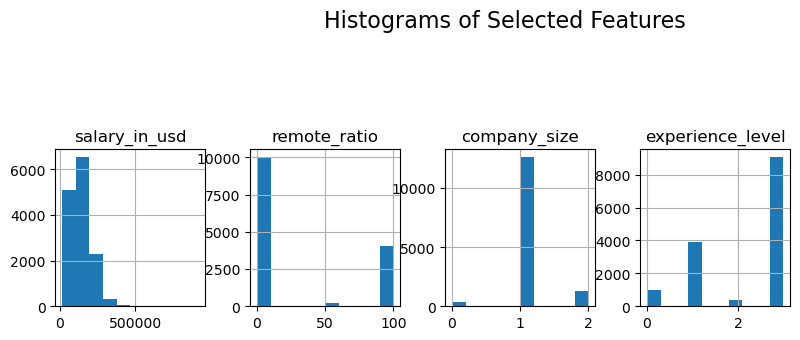

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Display histograms for specific columns
selected_columns = [ 'salary_in_usd', 'remote_ratio', 'company_size',
       'experience_level', ]



#.hist() is a pandas method used to plot histograms for the selected columns.
#bins=10 specifies the number of bins (intervals) for each histogram.
#figsize=(12, 10) sets the size of the overall figure to be 12 units wide and 10 units high.
#layout=(3, 3) indicates that the histograms should be arranged in a 3x3 grid (3 rows, 3 columns).
#sharex=False ensures that each subplot has its own x-axis.
final_df[selected_columns].hist(bins=10, figsize=(12, 10), layout=(4, 5), sharex=False)

#plt.suptitle() is a Matplotlib function used to add a centered title to the entire figure.
#The title is set to 'Histograms of Selected Numerical Features'.
#y=1.02 adjusts the vertical position of the title, placing it slightly above the default position.
#fontsize=16 sets the font size of the title to 16 points.
plt.suptitle('Histograms of Selected Features', y=1.02, fontsize=16)

#Displays the histograms
plt.show()

In [53]:
final_df

,salary_in_usd,remote_ratio,company_size,experience_level,job_title_account manager,job_title_agile coach/scrum master,job_title_ai developer,job_title_ai research engineer,job_title_ai scientist,job_title_backend developer,...,company_location_Turkey,company_location_Türkiye,company_location_Uganda,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Uruguay,company_location_Viet Nam,company_location_Vietnam
0,145400.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,88000.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,205500.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,117400.00,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,148300.00,0.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,75768.00,0.0,1.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1162,64944.00,0.0,2.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1163,119064.00,0.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1164,41510.04,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#X-y split (y is the target variable, in this case, "salary_in_usd")
X = final_df[[X for X in final_df.keys() if X != "salary_in_usd"]]
y = final_df[["salary_in_usd"]]

In [55]:
#Train-test split.
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#retrieves the X-train DF; that trains the model
X_train.head()

,remote_ratio,company_size,experience_level,job_title_account manager,job_title_agile coach/scrum master,job_title_ai developer,job_title_ai research engineer,job_title_ai scientist,job_title_backend developer,job_title_business development/sales,...,company_location_Turkey,company_location_Türkiye,company_location_Uganda,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Uruguay,company_location_Viet Nam,company_location_Vietnam
1036,0.0,0.0,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4445,100.0,1.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9496,100.0,1.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9535,0.0,1.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5601,0.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
#Retrieves y_test DF; the test target
#Contains the actual target values.
y_test.dtypes

salary_in_usd    float64
dtype: object

array([[<Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

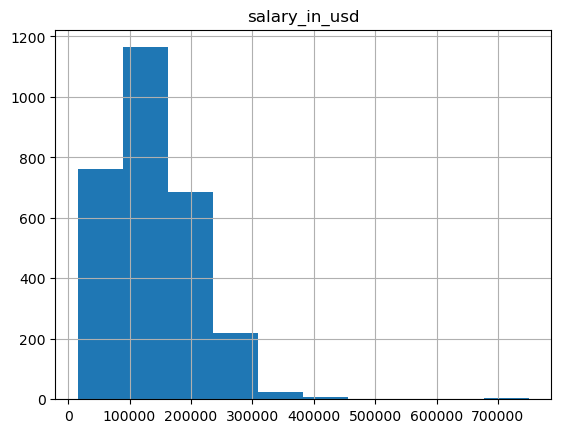

In [58]:
y_test.hist()

In [59]:
#Standardizes the data (after the data split!).
# This transforms each feature individually, scaling it based on the minimum and maximum values present in 
#that particular feature to get a range of values between [0,1]
#scaler = MinMaxScaler()
#create the fit/frame
#scaler = scaler.fit(X_train)

#StandardScaler
scaler = StandardScaler()
# Fit the data
scaler = scaler.fit(X_train)

# Initialize the PowerTransformer
#scaler = PowerTransformer()
# Fit the data
#scaler = scaler.fit(X_train)

#scaler = StandardScaler()
#Fit and transform the data
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


# Choose an alpha value (regularization strength)
alpha = 1.0


#transforms the data of X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train
#X_train_scaled

array([[-0.64382041, -3.19803176, -1.15401041, ..., -0.00934335,
        -0.01618456, -0.01321406],
       [ 1.58177   , -0.19527364,  0.72896114, ..., -0.00934335,
        -0.01618456, -0.01321406],
       [ 1.58177   , -0.19527364,  0.72896114, ..., -0.00934335,
        -0.01618456, -0.01321406],
       ...,
       [-0.64382041, -0.19527364,  0.72896114, ..., -0.00934335,
        -0.01618456, -0.01321406],
       [-0.64382041, -0.19527364,  0.72896114, ..., -0.00934335,
        -0.01618456, -0.01321406],
       [-0.64382041, -0.19527364,  0.72896114, ..., -0.00934335,
        -0.01618456, -0.01321406]])

In [60]:
#tranforming the y_train because there is a large skew
#this may be negligible when the skew isn't noticeable
#standardizing the y_train with PowerTransformer
pt = PowerTransformer()

In [61]:
#standardizing the y_train with PowerTransformer
pt.fit(y_train)

#transforms the X-test
y_train = pt.transform(y_train)


In [62]:
#transforms the y-test
y_test = pt.transform(y_test)
y_test

array([[ 1.17743553],
       [-0.52108246],
       [-0.57730719],
       ...,
       [ 0.08631543],
       [-0.76668588],
       [-0.25656436]])

In [63]:
pt.inverse_transform(y_test)

C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[219650.],
       [ 95000.],
       [ 92000.],
       ...,
       [131712.],
       [ 82365.],
       [110000.]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

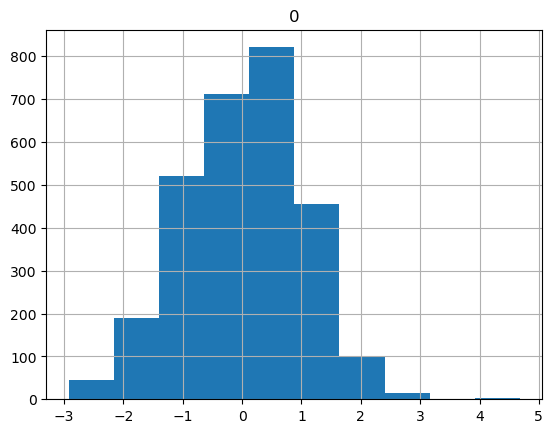

In [64]:
#This resets the index of the y_test pandas Series and drops the old index. 

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop = True)
y_test.hist()

In [65]:
y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_train)
#train = pd.concat([X_train, y_train], axis = 1)

### Model Training

In [66]:
#Create and fit a linear regression model
#This calculates the line of best fit
#lm = LinearRegression()
#model = lm.fit(X_train, y_train)


# Create and train the Ridge Regression model
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

Ridge()

In [67]:
#displays the model coefficient
model.coef_

array([[-0.00042379,  0.03492929,  0.24815446, -0.00307244,  0.00414886,
         0.03723257, -0.00914515,  0.00966373,  0.01440192,  0.01110238,
        -0.05498548, -0.03953953,  0.00908436,  0.01958222, -0.18573745,
         0.00315219,  0.00924194, -0.00660593, -0.01093515, -0.01679787,
        -0.0473115 , -0.03903805,  0.01089209,  0.04249246,  0.02030906,
         0.01096488, -0.01388308,  0.00833295,  0.02019667, -0.00877303,
         0.00050675,  0.03110739,  0.008835  ,  0.013678  ,  0.01742171,
         0.06009846,  0.00047026,  0.14413518, -0.01857606, -0.00212865,
        -0.06040816,  0.00434433, -0.00069843,  0.01014214, -0.00049947,
         0.01451758, -0.00727409, -0.00370122, -0.03149837,  0.06088455,
         0.00960104,  0.08489144,  0.00423042,  0.00583223,  0.01413875,
        -0.00335222, -0.00342628, -0.01364121, -0.00779065, -0.01596377,
        -0.01192911, -0.0040912 , -0.01941339,  0.        , -0.02366228,
         0.        , -0.00592209, -0.03950739, -0.0

In [68]:
#displays the model intercept
model.intercept_

array([-9.01169426e-16])

### Predict salary

In [69]:
random_salary = pd.DataFrame(X_test).sample()
random_salary

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
1321,1.58177,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.1092,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214


In [70]:
model.predict(random_salary)

array([[0.45195502]])

In [71]:
pt.inverse_transform(model.predict(random_salary))


C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[157857.62746717]])

### Create predictions for test set

In [72]:

# Create predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([[ 0.21832112],
       [-0.55097678],
       [-0.78461068],
       ...,
       [-0.08276582],
       [ 0.45195502],
       [-0.08370899]])

In [73]:
# inverse transforming predictions
pt.inverse_transform(y_pred)

C:\Users\Leih-Pool\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[140785.08834169],
       [ 93396.85557738],
       [ 81489.91025877],
       ...,
       [120676.57595891],
       [157857.62746717],
       [120616.83074513]])

In [74]:
# inputing y_pred into a df
y_pred = pd.DataFrame(y_pred)

#Displays the DF containing the predicted target values.
y_pred

,0
0,0.218321
1,-0.550977
2,-0.784611
3,0.582381
4,0.477497
...,...
2859,-0.550034
2860,0.010229
2861,-0.082766
2862,0.451955


In [75]:
# inputing y_test into a df
y_test = pd.DataFrame(y_test)


In [76]:
#resets the index of y_test
y_test = y_test.reset_index(drop=True)

In [77]:
#is using the concat function from pandas to concatenate two Series (or DataFrames) along the columns (axis=1). 
#This operation is often done to create a DataFrame that contains both the actual target values  
#(y_test) and the predicted values (y_pred), making it easier to analyze and visualize the residuals.
residuals_salary_df = pd.concat([y_test, y_pred], axis = 1)
residuals_salary_df.columns = ["y_test","y_pred"]
residuals_salary_df

,y_test,y_pred
0,1.177436,0.218321
1,-0.521082,-0.550977
2,-0.577307,-0.784611
3,0.149440,0.582381
4,0.466968,0.477497
...,...,...
2859,1.030332,-0.550034
2860,1.435071,0.010229
2861,0.086315,-0.082766
2862,-0.766686,0.451955


In [78]:
# This calculates the residuals and adds a new column named "residual" to the DataFrame
residuals_salary_df["residual"] = residuals_salary_df["y_test"] - residuals_salary_df["y_pred"]
#Displays the residuals DF
residuals_salary_df

,y_test,y_pred,residual
0,1.177436,0.218321,0.959114
1,-0.521082,-0.550977,0.029894
2,-0.577307,-0.784611,0.207303
3,0.149440,0.582381,-0.432941
4,0.466968,0.477497,-0.010528
...,...,...,...
2859,1.030332,-0.550034,1.580366
2860,1.435071,0.010229,1.424842
2861,0.086315,-0.082766,0.169081
2862,-0.766686,0.451955,-1.218641


In [79]:
#Displays the first few rows of the DataFrame residuals_salary_df after adding the "residual" colum
residuals_salary_df.head()
residuals_salary_df

,y_test,y_pred,residual
0,1.177436,0.218321,0.959114
1,-0.521082,-0.550977,0.029894
2,-0.577307,-0.784611,0.207303
3,0.149440,0.582381,-0.432941
4,0.466968,0.477497,-0.010528
...,...,...,...
2859,1.030332,-0.550034,1.580366
2860,1.435071,0.010229,1.424842
2861,0.086315,-0.082766,0.169081
2862,-0.766686,0.451955,-1.218641


### Calculating metrics

In [80]:
#Calculating metrics

#This method calculates the mean of the values in the "residual" column, providing a single value that represents 
#the average error across all observations. 
mean_error = residuals_salary_df["residual"].mean()

#Displays the result which is assigned to the variable mean_error.
mean_error

0.013810444136331906

In [81]:
#This uses the mean squared error (MSE) function from scikit-learn to calculate the mean squared difference between 
#the actual target values (y_test) and the predicted values (y_pred).
#This uses the mean squared error (MSE) function from scikit-learn to calculate the mean squared difference between 
#the actual target values (y_test) and the predicted values (y_pred).
mse(y_test, y_pred)

0.5031762423743605

In [82]:
#This uses the mean absolute error (MAE) function from scikit-learn to calculate 
#the mean absolute difference between the actual target values (y_test) and the predicted values (y_pred).
mae(y_test, y_pred)

0.5468311209814745

In [83]:
# This calculates the Root Mean Squared Error (RMSE) by using the mean_squared_error function 
#from scikit-learn and sets the squared parameter to False.
#The square root of the mse
#On average the model is going to have --- off
rsme = mse(y_test,y_pred, squared = False)
rsme

0.7093491681635783

In [84]:
#A measure that explains how good the model is at explaining the target variable
#Explanatory power of the model
#The input variable explains  variability of the target variable
#R squared
#R2

#The input variables explains 49% variability of the target variable
r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.49

In [85]:
y_train_pred = pd.DataFrame(model.predict(X_train))
y_train_pred

,0
0,-1.067089
1,0.476554
2,-0.083709
3,0.024751
4,-0.442517
...,...
11451,0.958601
11452,-0.621104
11453,0.477497
11454,0.898864


In [86]:
r2_train = round(r2_score(y_train, y_train_pred),2)
r2_train

0.5

In [87]:
#fi feature importance based on the variables and coefficient
#features can be gotten list(X_train.columns)
feature_names = list(X.columns)
feature_names

['remote_ratio',
 'company_size',
 'experience_level',
 'job_title_account manager',
 'job_title_agile coach/scrum master',
 'job_title_ai developer',
 'job_title_ai research engineer',
 'job_title_ai scientist',
 'job_title_backend developer',
 'job_title_business development/sales',
 'job_title_business intelligence analyst',
 'job_title_business intelligence engineer',
 'job_title_cloud data engineer',
 'job_title_computer vision engineer',
 'job_title_data analyst',
 'job_title_data architect',
 'job_title_data engineer/developer',
 'job_title_data integrations engineer',
 'job_title_data modeller',
 'job_title_data operations/infrastructure',
 'job_title_data product manager',
 'job_title_data quality analyst',
 'job_title_data science engineer',
 'job_title_data science manager',
 'job_title_data scientist',
 'job_title_devops',
 'job_title_financial data analyst',
 'job_title_frontend developer',
 'job_title_fullstack developer',
 'job_title_graphic designer',
 'job_title_hardwa

In [88]:
coefficients = model.coef_
coefficients

array([[-0.00042379,  0.03492929,  0.24815446, -0.00307244,  0.00414886,
         0.03723257, -0.00914515,  0.00966373,  0.01440192,  0.01110238,
        -0.05498548, -0.03953953,  0.00908436,  0.01958222, -0.18573745,
         0.00315219,  0.00924194, -0.00660593, -0.01093515, -0.01679787,
        -0.0473115 , -0.03903805,  0.01089209,  0.04249246,  0.02030906,
         0.01096488, -0.01388308,  0.00833295,  0.02019667, -0.00877303,
         0.00050675,  0.03110739,  0.008835  ,  0.013678  ,  0.01742171,
         0.06009846,  0.00047026,  0.14413518, -0.01857606, -0.00212865,
        -0.06040816,  0.00434433, -0.00069843,  0.01014214, -0.00049947,
         0.01451758, -0.00727409, -0.00370122, -0.03149837,  0.06088455,
         0.00960104,  0.08489144,  0.00423042,  0.00583223,  0.01413875,
        -0.00335222, -0.00342628, -0.01364121, -0.00779065, -0.01596377,
        -0.01192911, -0.0040912 , -0.01941339,  0.        , -0.02366228,
         0.        , -0.00592209, -0.03950739, -0.0

In [89]:
coefficients = [i for i in coefficients[0]]

In [90]:
fi_dict = {"names":feature_names, "coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,names,coeff
0,remote_ratio,-0.000424
1,company_size,0.034929
2,experience_level,0.248154
3,job_title_account manager,-0.003072
4,job_title_agile coach/scrum master,0.004149
...,...,...
143,company_location_United Kingdom,-0.042228
144,company_location_United States,0.252001
145,company_location_Uruguay,-0.010949
146,company_location_Viet Nam,-0.015318


In [91]:
fi_df_sorted = fi_df.sort_values(by = "coeff", ascending = False)

<Axes: xlabel='coeff', ylabel='names'>

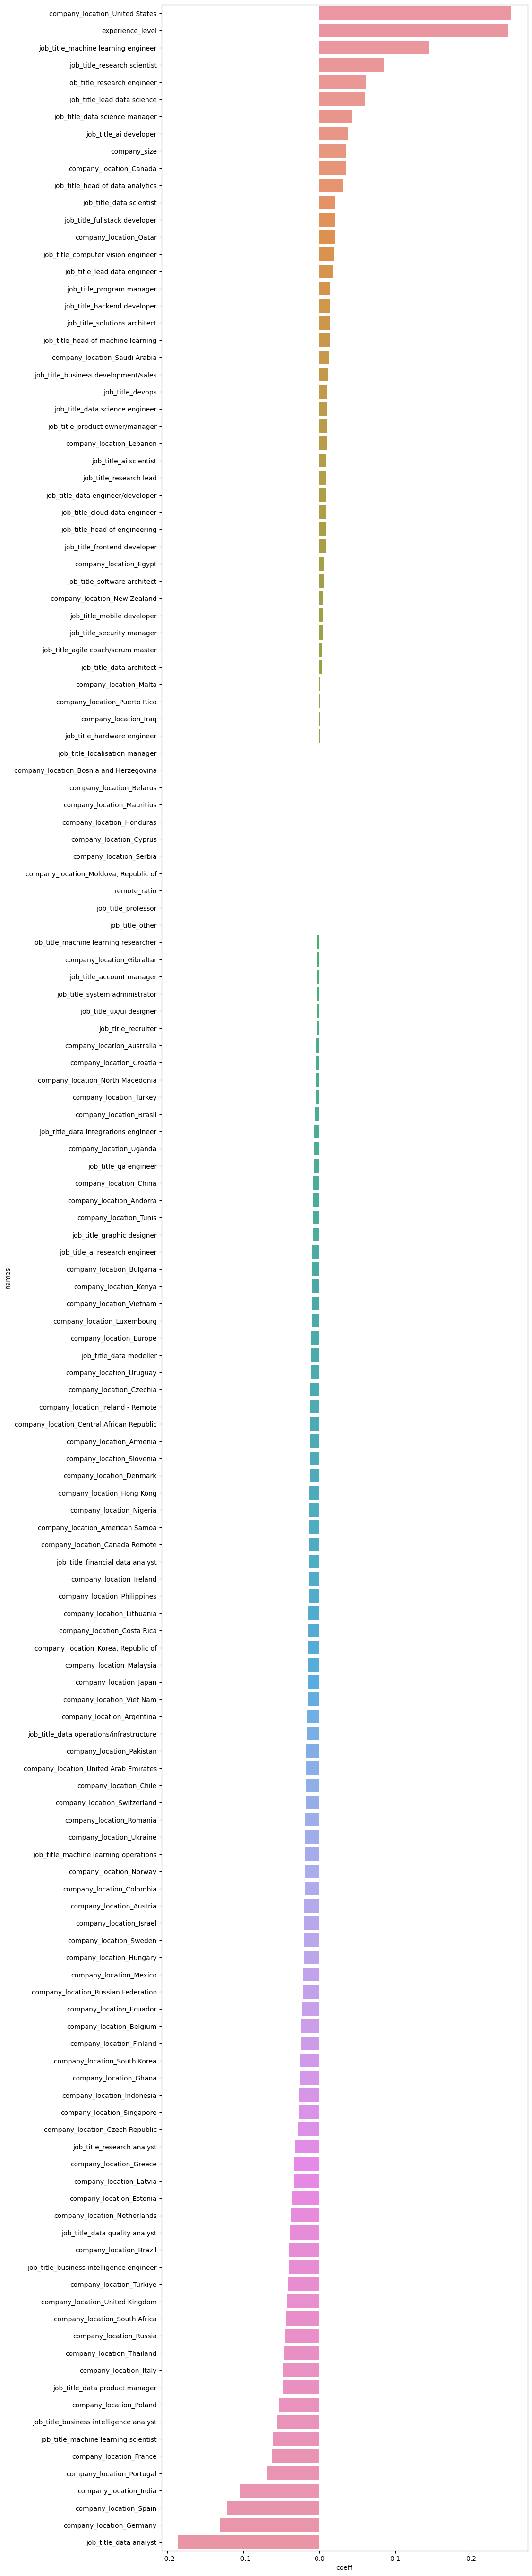

In [92]:
plt.figure(figsize = (10,70))
sns.barplot(y = fi_df_sorted["names"], x = fi_df_sorted["coeff"])

In [93]:

final_df.head()

,salary_in_usd,remote_ratio,company_size,experience_level,job_title_account manager,job_title_agile coach/scrum master,job_title_ai developer,job_title_ai research engineer,job_title_ai scientist,job_title_backend developer,...,company_location_Turkey,company_location_Türkiye,company_location_Uganda,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Uruguay,company_location_Viet Nam,company_location_Vietnam
0,145400.0,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,88000.0,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,205500.0,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,117400.0,0.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,148300.0,0.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## User imput simulation

In [94]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-0.64382,-3.198032,-1.154010,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,9.15747,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,-1.782687,-0.009343,-0.016185,-0.013214
1,1.58177,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214
2,1.58177,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214
3,-0.64382,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214
4,-0.64382,-0.195274,-1.154010,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,-0.64382,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214
11452,-0.64382,2.807484,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,-1.782687,-0.009343,-0.016185,-0.013214
11453,-0.64382,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214
11454,-0.64382,-0.195274,0.728961,-0.013214,-0.016185,-0.089482,-0.020896,-0.03967,-0.10920,-0.016185,...,-0.013214,-0.018689,-0.009343,-0.02804,-0.024727,-0.224354,0.560951,-0.009343,-0.016185,-0.013214


In [95]:
# reinstate column names to X_train
X.columns = [col.strip().replace(" ", "_").lower() for col in X.columns]
X_columns = X.columns
X_train.columns = X_columns

In [96]:
# create a new and empty df based onX_train

prediction_df = X_train.drop(X_train.index)

prediction_df.loc[len(prediction_df)] = 0
prediction_df

,remote_ratio,company_size,experience_level,job_title_account_manager,job_title_agile_coach/scrum_master,job_title_ai_developer,job_title_ai_research_engineer,job_title_ai_scientist,job_title_backend_developer,job_title_business_development/sales,...,company_location_turkey,company_location_türkiye,company_location_uganda,company_location_ukraine,company_location_united_arab_emirates,company_location_united_kingdom,company_location_united_states,company_location_uruguay,company_location_viet_nam,company_location_vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# generate X_input based on user input for X variables

# create a list of countries to print out for user input
countries = list(set(merged_df['company_location']))
countries.sort()
countries_printed = "\n".join(countries)

# user input begins here
remote_input = input(f"How remote is the job?\n"
                     " '0' = Job is completely on-site\n"
                     " '50' = Job is hybrid, partially on-site, partially remote\n"
                     " '100' = Job is completely remote\n")
size_input = input(f"Enter the size of the company.\n"
                   " '0' = Small, approx. 0-50 employees\n"
                   " '1' = Medium, approx. 50-1000 employees\n"
                   " '2' = Large, approx. 1000+ employees\n").strip("' ").upper()
experience_input = input(f"Enter your experience level.\n" 
                         " '0' = Entry level, approx. 0-1 year of experience\n" 
                         " '1' = Mid-level, approx. 1-8 years of experience\n"
                         " '2' = Senior level, approx. 8+ years of experience\n"
                         " '3' = Executive level, approx. 10+ with an executive function\n"
                        ).strip("' ").upper()
job_title_input = input(f"Enter the job title that fits best with the list of options below:\n"
                        " Account Manager\n"
                        " Agile Coach/Scrum Master\n"
                        " AI Developer\n"
                        " AI Research Engineer\n"
                        " AI Scientist\n"
                        " Backend Developer\n"
                        " Business Development/Sales\n"
                        " Business Intelligence Analyst\n"
                        " Business Intelligence Engineer\n"
                        " Cloud Data Engineer\n"
                        " Computer Vision Engineer\n"
                        " Data Analyst\n"
                        " Data Architect\n"
                        " Data Engineer/Developer\n"
                        " Data Integrations Engineer\n"
                        " Data Modeller\n"
                        " Data Operations/Infrastructure\n"
                        " Data Product Manager\n"
                        " Data Quality Analyst\n"
                        " Data Science Engineer\n"
                        " Data Science Manager\n"
                        " Data Scientist\n"
                        " DevOps\n"
                        " Financial Data Analyst\n"
                        " Frontend Developer\n"
                        " Fullstack Developer\n"
                        " Graphic Designer\n"
                        " Hardware Engineer\n"
                        " Head of Data Analytics\n"
                        " Head of Engineering\n"
                        " Head of Machine Learning\n"
                        " Lead Data Engineer\n"
                        " Lead Data Science\n"
                        " Localisation Manager\n"
                        " Machine Learning Engineer\n"
                        " Machine Learning Operations\n"
                        " Machine Learning Researcher\n"
                        " Machine Learning Scientist\n"
                        " Mobile Developer\n"
                        " Other\n"
                        " Product Owner/Manager\n"
                        " Professor\n"
                        " Program Manager\n"
                        " QA Engineer\n"
                        " Recruiter\n"
                        " Research Analyst\n"
                        " Research Engineer\n"
                        " Research Lead\n"
                        " Research Scientist\n"
                        " Security Manager\n"
                        " Solutions Architect\n"
                        " Software Architect\n"
                        " System Administrator\n"
                        " UX/UI Designer\n"
                        ).strip().lower().replace(' ','_')
location_input = input(f"Select the country in which your company is located:\n{countries_printed}\n").strip().lower()
                       
# create X_input dictionary based on user input 
X_input = {'remote_ratio': remote_input, 'company_size': size_input, 'experience_level': experience_input,
           job_title_input: 1, location_input: 1}
X_input

In [ ]:
for column in prediction_df.columns:
    for key,value in X_input.items():
        if key in column:
            prediction_df.at[0, column] = X_input[key]
            

prediction_df

In [ ]:
#user_salary = model.predict(prediction_df)

user_salary = pt.inverse_transform(model.predict(prediction_df))
user_salary